In [1]:
pip install snowflake-snowpark-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 2.4 MB/s eta 0:00:00


In [2]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=f36e6eb74ab9455f35336b5ccf360917c9840fd6d35c769fba1bfb2e23ca12ea
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [3]:
from snowflake.snowpark import Session
import numpy as np
import pandas as pd
from googletrans import Translator
from snowflake.snowpark.functions import year, month
from snowflake.snowpark.functions import col,sum as sum_
from snowflake.snowpark.functions import count, lit
from snowflake.snowpark.types import IntegerType, FloatType, DoubleType, DecimalType, StringType, DateType, TimestampType, LongType
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
connection_parameters = {
...    "account": "YEZEPEO-VNSHARED",
...    "user": "VNSHARED",
...    "password": "Stratify2024!",
...    "role": "SYSADMIN", # optional
...    "warehouse": "ANALYSIS", # optional
...   "database": "VN_SHARED_DB" # optional
# ...    "schema": "your snowflake schema",  # optional
...  }

In [5]:
new_session = Session.builder.configs(connection_parameters).create()

In [6]:
df_consolidated=new_session.table('PUBLIC.TBPAGOS_DOCUMENTOSCOBRO_CONSOLIDADOEXTENDIDO_TS_SHARED')
df_equifax=new_session.table('PUBLIC.EQUIFAX_SHARED')
# Finding Common columns
common_cols = np.intersect1d(df_consolidated.columns, df_equifax.columns)

# Printing common columns
print ("Common Columns:",common_cols)

df_con_equifax=df_consolidated.join(df_equifax.select('"RUT"', '"Score Equifax"'), on='"RUT"', how='left').drop(df_equifax['"FechaExtraccion"'])

Common Columns: ['"FechaExtraccion"' 'RUT']


In [7]:
df_con_equifax.columns

['RUT',
 '"NumeroDocumento"',
 '"NumeroFolio"',
 '"FechaEmision"',
 '"FechaVencimiento"',
 '"FechaRegistro"',
 '"BusinessPartnerId"',
 '"CuentaContrato"',
 '"ClaveReconciliacion"',
 '"Cabecera_FechaHoraCreacion"',
 '"Cabecera_FechaHoraUltimaModificacion"',
 '"PosicionDocumento"',
 '"ImportePesos"',
 '"DocumentoCompensacion"',
 '"FechaCompensacion"',
 '"DiasCompensacion"',
 '"OperacionPrincipal"',
 '"OperacionParcial"',
 '"Detalle_FechaHoraCreacion"',
 '"Detalle_FechaHoraUltimaModificacion"',
 '"Direccion"',
 'COMUNA',
 'CIUDAD',
 'REGION',
 '"Nombre"',
 '"CantidadCuentasContrato"',
 '"MaxCategoriaVehiculo"',
 '"CantidadVehiculos"',
 '"TramoMoraCliente"',
 '"TramoMora"',
 '"Inhabilitado"',
 '"Concesionaria"',
 '"TipoCliente"',
 '"TipoOperacion"',
 '"TipoDocumento"',
 '"TipoProducto"',
 '"StatusCompensacion"',
 '"StatusCompensacionTmp"',
 '"Score Equifax"']

In [8]:
def missing_values(df):
# Assuming 'df' is your DataFrame
    # Get the total number of rows
    total_rows = df.count()

    missing_percentages = df.select(
        [(100 - (count(c) / lit(total_rows) * 100)).alias(c) for c in df.columns]
    )

    # Show the results
    missing_percentages.show()

In [9]:
# Define the new column name for the second column
new_column_name = 'FechaExtraccion'

# Use withColumnRenamed to create a new DataFrame with the renamed column
df_con_equifax_v = df_con_equifax.withColumnRenamed(df_con_equifax.columns[1], new_column_name)

In [10]:
missing_values(df_con_equifax_v)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"RUT"     |"FECHAEXTRACCION"  |"NumeroFolio"  |"FechaEmision"  |"FechaVencimiento"  |"FechaRegistro"  |"BusinessPartnerId"  |"CuentaContrato"  |"ClaveReconciliacion"  |"Cabecera_FechaHoraCreacion"

In [11]:
# Or you can pass a list of columns:
columns_to_drop = ['"NumeroDocumento"', '"NumeroFolio"', '"BusinessPartnerId"', '"RUT"','"CuentaContrato"','"StatusCompensacionTmp"',
                      '"FechaRegistro"','"ClaveReconciliacion"','"Cabecera_FechaHoraCreacion"','"Detalle_FechaHoraCreacion"','"Direccion"','"Nombre"','FECHAEXTRACCION']
df_con_equifax_v_dropped = df_con_equifax_v.drop(*columns_to_drop)

In [12]:
df_con_equifax_v_dropped.columns

['"FechaEmision"',
 '"FechaVencimiento"',
 '"Cabecera_FechaHoraUltimaModificacion"',
 '"PosicionDocumento"',
 '"ImportePesos"',
 '"DocumentoCompensacion"',
 '"FechaCompensacion"',
 '"DiasCompensacion"',
 '"OperacionPrincipal"',
 '"OperacionParcial"',
 '"Detalle_FechaHoraUltimaModificacion"',
 'COMUNA',
 'CIUDAD',
 'REGION',
 '"CantidadCuentasContrato"',
 '"MaxCategoriaVehiculo"',
 '"CantidadVehiculos"',
 '"TramoMoraCliente"',
 '"TramoMora"',
 '"Inhabilitado"',
 '"Concesionaria"',
 '"TipoCliente"',
 '"TipoOperacion"',
 '"TipoDocumento"',
 '"TipoProducto"',
 '"StatusCompensacion"',
 '"Score Equifax"']

In [13]:
columns_to_drop2=['"Cabecera_FechaHoraUltimaModificacion"', '"Detalle_FechaHoraUltimaModificacion"']
df_con_equifax_v_dropped = df_con_equifax_v_dropped.drop(*columns_to_drop2)
df_con_equifax_v_dropped.columns

['"FechaEmision"',
 '"FechaVencimiento"',
 '"PosicionDocumento"',
 '"ImportePesos"',
 '"DocumentoCompensacion"',
 '"FechaCompensacion"',
 '"DiasCompensacion"',
 '"OperacionPrincipal"',
 '"OperacionParcial"',
 'COMUNA',
 'CIUDAD',
 'REGION',
 '"CantidadCuentasContrato"',
 '"MaxCategoriaVehiculo"',
 '"CantidadVehiculos"',
 '"TramoMoraCliente"',
 '"TramoMora"',
 '"Inhabilitado"',
 '"Concesionaria"',
 '"TipoCliente"',
 '"TipoOperacion"',
 '"TipoDocumento"',
 '"TipoProducto"',
 '"StatusCompensacion"',
 '"Score Equifax"']

In [14]:
missing_values(df_con_equifax_v_dropped)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"FechaEmision"  |"FechaVencimiento"  |"PosicionDocumento"  |"ImportePesos"  |"DocumentoCompensacion"  |"FechaCompensacion"  |"DiasCompensacion"  |"OperacionPrincipal"  |"OperacionParcial"  |"COMUNA"  |"CIUDAD"  |"REGION"  |"CantidadCuentasContrato"  |"MaxCategoriaVehiculo"  |"CantidadVehiculos"  |"TramoMoraCliente"  |"TramoMora"  |"Inhabilitado"  |"Concesionaria"  |"TipoCliente"  |"TipoOperacion"  |"TipoDocumento"  |"TipoProducto"  |"StatusCompensacion"  |"Score Equifax"  |
----------------------------------------

In [15]:
from snowflake.snowpark.functions import col, is_null
df_with_missing_values = df_con_equifax_v_dropped.where(is_null(col('"DiasCompensacion"')))
df_with_missing_values.select('"StatusCompensacion"').distinct().collect()

[Row(StatusCompensacion='Impaga'),
 Row(StatusCompensacion='Pagada'),
 Row(StatusCompensacion='Castigado')]

In [16]:
from snowflake.snowpark.functions import count

# Group by the column and count the occurrences of each unique value
count_distinct_types = df_with_missing_values.groupBy('"StatusCompensacion"').agg(count("*").alias("count"))

# Show the results
count_distinct_types.show()

-----------------------------------
|"StatusCompensacion"  |"COUNT"   |
-----------------------------------
|Pagada                |69        |
|Castigado             |1         |
|Impaga                |47573682  |
-----------------------------------



In [17]:
from snowflake.snowpark.functions import col, is_null

# List of columns to check for null values
columns_to_check = ['"Score Equifax"', '"MaxCategoriaVehiculo"', '"CantidadVehiculos"']  # replace with your actual column names

# Generate a condition that requires all specified columns to be non-null
condition = ~is_null(col(columns_to_check[0]))
for column_name in columns_to_check[1:]:
    condition &= ~is_null(col(column_name))

# Apply this condition to filter out rows with null values in any of the specified columns
df_con_equifax_v_dropped = df_con_equifax_v_dropped.filter(condition)

In [18]:
df_con_equifax_v_dropped

In [30]:
df_con_equifax_h = df_con_equifax.limit(100000).to_pandas()
df_con_equifax_h

,RUT,NumeroDocumento,NumeroFolio,FechaEmision,FechaVencimiento,FechaRegistro,BusinessPartnerId,CuentaContrato,ClaveReconciliacion,Cabecera_FechaHoraCreacion,...,TramoMora,Inhabilitado,Concesionaria,TipoCliente,TipoOperacion,TipoDocumento,TipoProducto,StatusCompensacion,StatusCompensacionTmp,Score Equifax
0,10586929-0,5.410001e+10,26562816.0,2013-03-08,2013-03-25,2013-03-07,0011201223,001100830220,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,TSC,Natural,Intereses,Boleta Exenta,Tag,Pagada,Pagada,442.0
1,10586929-0,5.410001e+10,26562816.0,2013-03-08,2013-03-25,2013-03-07,0011201223,001100830220,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta Exenta,Tag,Pagada,Pagada,442.0
2,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,TSC,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
3,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
4,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11624193-5,5.650073e+10,13701583.0,2019-01-04,2019-01-19,2019-01-04,0011265144,001101276180,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,367.0
99996,76182251-9,5.650073e+10,4651616.0,2019-01-04,2019-01-21,2019-01-04,0012237958,001101665867,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Juridico,Peaje,Factura Electronica,Tag,Pagada,Pagada,999.0
99997,16015697-K,5.650073e+10,51499241.0,2019-01-04,2019-01-20,2019-01-04,0012391925,001101796723,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta Exenta,Tag,Pagada,Pagada,725.0
99998,16015697-K,5.650073e+10,51499241.0,2019-01-04,2019-01-20,2019-01-04,0012391925,001101796723,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta Exenta,Tag,Pagada,Pagada,725.0


# Exploration related to debt bucket

In [33]:
df_con_equifax_2 = df_con_equifax_h#[df_con_equifax_h['TipoOperacion'] == 'Peaje']
df_con_equifax_2

,RUT,NumeroDocumento,NumeroFolio,FechaEmision,FechaVencimiento,FechaRegistro,BusinessPartnerId,CuentaContrato,ClaveReconciliacion,Cabecera_FechaHoraCreacion,...,TramoMora,Inhabilitado,Concesionaria,TipoCliente,TipoOperacion,TipoDocumento,TipoProducto,StatusCompensacion,StatusCompensacionTmp,Score Equifax
0,10586929-0,5.410001e+10,26562816.0,2013-03-08,2013-03-25,2013-03-07,0011201223,001100830220,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,TSC,Natural,Intereses,Boleta Exenta,Tag,Pagada,Pagada,442.0
1,10586929-0,5.410001e+10,26562816.0,2013-03-08,2013-03-25,2013-03-07,0011201223,001100830220,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta Exenta,Tag,Pagada,Pagada,442.0
2,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,TSC,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
3,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
4,10285139-0,5.410001e+10,3075642.0,2013-03-08,2013-03-25,2013-03-07,0011474852,001101021815,13065FA020AR,2021-04-23 06:34:06,...,Pago,Cliente Tag,AVN,Natural,Intereses,Boleta,Tag,Pagada,Pagada,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11624193-5,5.650073e+10,13701583.0,2019-01-04,2019-01-19,2019-01-04,0011265144,001101276180,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,367.0
99996,76182251-9,5.650073e+10,4651616.0,2019-01-04,2019-01-21,2019-01-04,0012237958,001101665867,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Juridico,Peaje,Factura Electronica,Tag,Pagada,Pagada,999.0
99997,16015697-K,5.650073e+10,51499241.0,2019-01-04,2019-01-20,2019-01-04,0012391925,001101796723,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta Exenta,Tag,Pagada,Pagada,725.0
99998,16015697-K,5.650073e+10,51499241.0,2019-01-04,2019-01-20,2019-01-04,0012391925,001101796723,19003FA010BL,2021-04-26 00:20:40,...,Pago,Cliente Tag,AVN,Natural,Peaje,Boleta Exenta,Tag,Pagada,Pagada,725.0


In [21]:
df_con_equifax_2['DiasCompensacion']

0         3.0
1         3.0
2        34.0
3        34.0
4        34.0
         ... 
99995   -12.0
99996   -17.0
99997   -16.0
99998   -16.0
99999    10.0
Name: DiasCompensacion, Length: 100000, dtype: float64

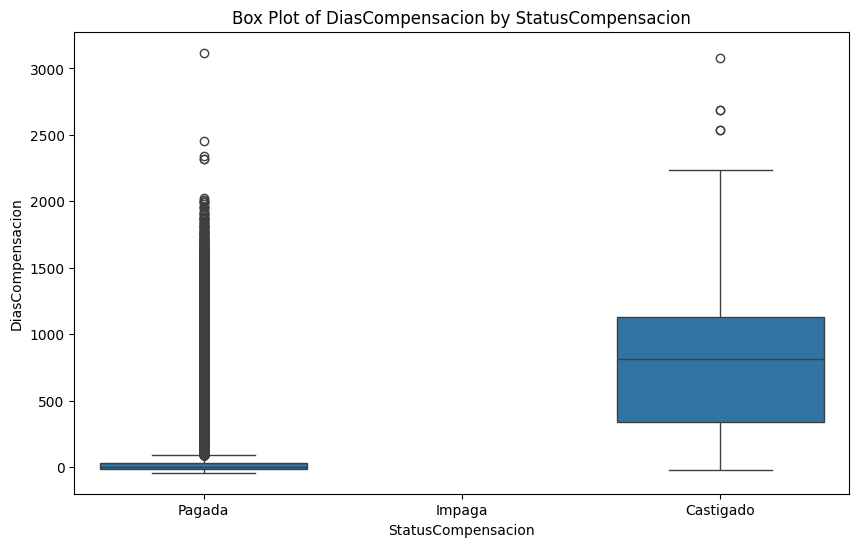

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the variables DiasCompensacion and StatusCompensacion

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='StatusCompensacion', y='DiasCompensacion', data=df_con_equifax_2)
plt.title('Box Plot of DiasCompensacion by StatusCompensacion')
plt.xlabel('StatusCompensacion')
plt.ylabel('DiasCompensacion')
plt.show()

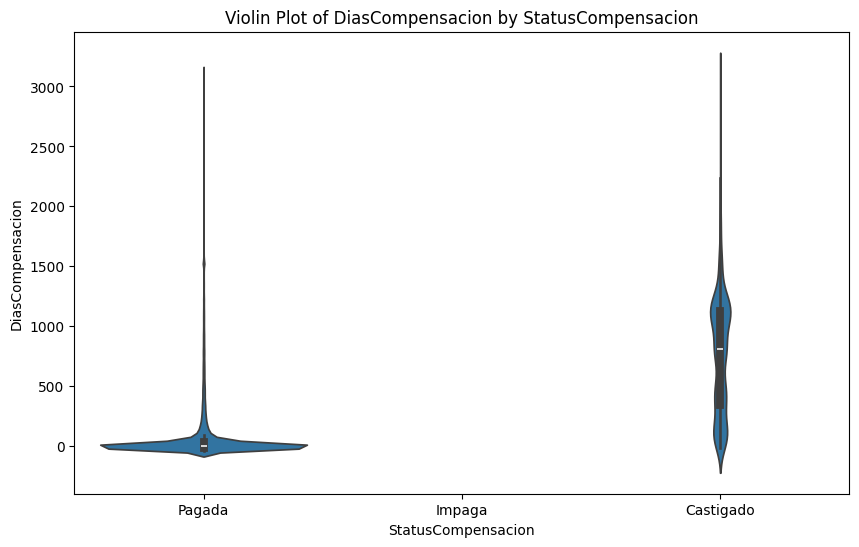

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='StatusCompensacion', y='DiasCompensacion', data=df_con_equifax_2)
plt.title('Violin Plot of DiasCompensacion by StatusCompensacion')
plt.xlabel('StatusCompensacion')
plt.ylabel('DiasCompensacion')
plt.show()

In [26]:
df_con_equifax_2['StatusCompensacion'].unique()

array(['Pagada', 'Impaga', 'Castigado'], dtype=object)

In [38]:
df_con_equifax_2['DiasCompensacion'].unique()

array([  3.,  34.,  -7., ..., 825., 877., 943.])

In [ ]:
df_con_equifax_2['TramoMora'].unique()

array(['Pago', '[361+] Dias', '[181 a 360] Dias', '[31 a 90] Dias',
       '[91 a 180] Dias', '[1 a 30] Dias', '[Al Dia]'], dtype=object)

In [ ]:
df_con_equifax_2['TramoMoraCliente'].unique()

array(['Pago', '[361+] Dias', '[Al Dia]', '[91 a 180] Dias',
       '[1 a 30] Dias', '[31 a 90] Dias', '[181 a 360] Dias'],
      dtype=object)

In [ ]:
cross_tab = pd.crosstab(df_con_equifax_2['StatusCompensacion'],df_con_equifax_2['TramoMoraCliente'])
print(cross_tab)

TramoMoraCliente     Pago  [1 a 30] Dias  [181 a 360] Dias  [31 a 90] Dias  \
StatusCompensacion                                                           
Castigado               0              0                 0               0   
Impaga                  0            214               717             316   
Pagada              43538           5895              2797            3604   

TramoMoraCliente    [361+] Dias  [91 a 180] Dias  [Al Dia]  
StatusCompensacion                                          
Castigado                  2780                0         0  
Impaga                     7993              322       614  
Pagada                    13006             1969     16235  


<Axes: xlabel='TramoMoraCliente', ylabel='StatusCompensacion'>

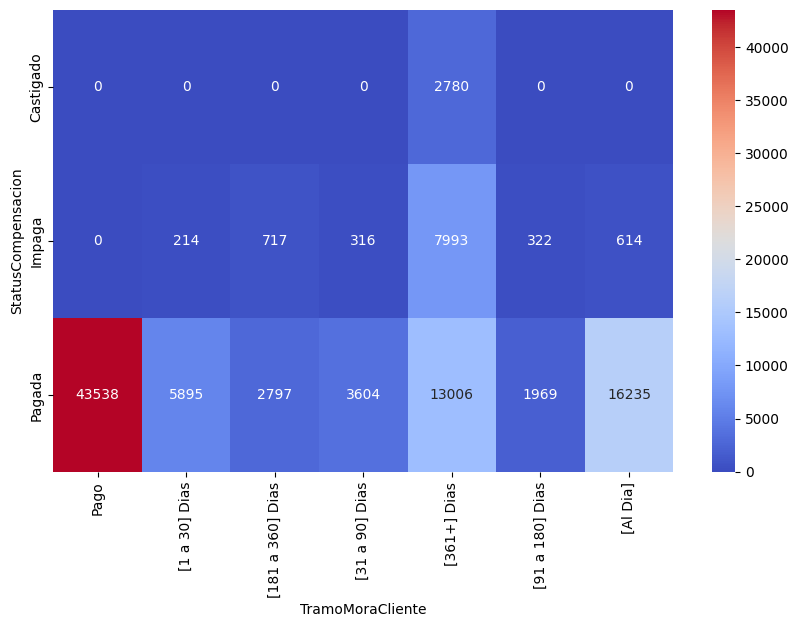

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')

As the debt bucket covers a longer time, the possibility for making payment drops

In [ ]:
#Debt bucket on different individuals
for i in df_con_equifax_2['RUT'].unique():
  print('Current RUT is', i)
  print(df_con_equifax_2[df_con_equifax_2['RUT'] == i][['FechaEmision', 'StatusCompensacion', 'TramoMoraCliente']])

Streaming output truncated to the last 5000 lines.
Current RUT is 6076893-5
      FechaEmision StatusCompensacion TramoMoraCliente
96430   2024-01-03             Impaga         [Al Dia]
96431   2024-01-03             Impaga         [Al Dia]
96432   2024-01-03             Impaga         [Al Dia]
Current RUT is 17088614-3
      FechaEmision StatusCompensacion TramoMoraCliente
96433   2024-01-03             Impaga         [Al Dia]
96434   2024-01-03             Pagada         [Al Dia]
96435   2024-01-03             Impaga         [Al Dia]
96436   2024-01-03             Pagada         [Al Dia]
Current RUT is 12279377-K
      FechaEmision StatusCompensacion TramoMoraCliente
96437   2024-01-03             Impaga      [361+] Dias
Current RUT is 7819018-3
      FechaEmision StatusCompensacion TramoMoraCliente
96438   2024-01-03             Impaga   [31 a 90] Dias
Current RUT is 19903224-0
      FechaEmision StatusCompensacion TramoMoraCliente
96439   2022-10-04             Impaga      [361+] D

Interestingly, it's easy to tell that each individual has a high consistency in choice of debt bucket, and their payment behavior is also very likely to be consistent with their choice of debt bucket, i.e., if a person is 'Pagada' with 'Pago', then for the next payment, the individual is very likely to keep with choosing debt bucket 'Pago' and make payment（‘Pagada'). Thus, it will be very helpful to know an individual's previous choice of debt bucket also previous payment behavior, to make future predictions.

In [ ]:
#To further explore about the previouslu mentioned consistency
num = 0
t_per = 0
for i in df_con_equifax_2['RUT'].unique():
  num = num + 1
  df = df_con_equifax_2[df_con_equifax_2['RUT'] == i][['FechaEmision', 'StatusCompensacion']]
  c_num = df['StatusCompensacion'].value_counts().max()
  perc = c_num/len(df['StatusCompensacion'])
  t_per = t_per + perc
print('On average, the possibility of consistent behavior for an individual is', t_per/num)

On average, the possibility of consistent behavior for an individual is 0.9881848054325165


Thus, the consistency is very high, suggesting that an individual's previous payment behavior will be helpful to decide his/her next payment condition.

# Exploration related to Highway concession (Concesionaria)

In [ ]:
df_con_equifax_h['Concesionaria'].unique()

array(['TSC', 'AVN'], dtype=object)

In [ ]:
df_con_equifax_h[df_con_equifax_h['Concesionaria'] == 'TSC']['ImportePesos']

0        240.0
1        727.0
4        308.0
12       368.0
17       884.0
         ...  
99974    263.0
99975      5.0
99987     23.0
99988      2.0
99997      1.0
Name: ImportePesos, Length: 15722, dtype: float64

In [ ]:
df_con_equifax_h[df_con_equifax_h['Concesionaria'] == 'AVN']['ImportePesos']

2         610.0
3          -3.0
5          44.0
6        1989.0
7         527.0
          ...  
99994    3664.0
99995    4495.0
99996    1668.0
99998      28.0
99999      49.0
Name: ImportePesos, Length: 84278, dtype: float64

In [ ]:
df_con_equifax_h['ImportePesos'].max()
#df_con_equifax_h['ImportePesos'].min()

1167284.0

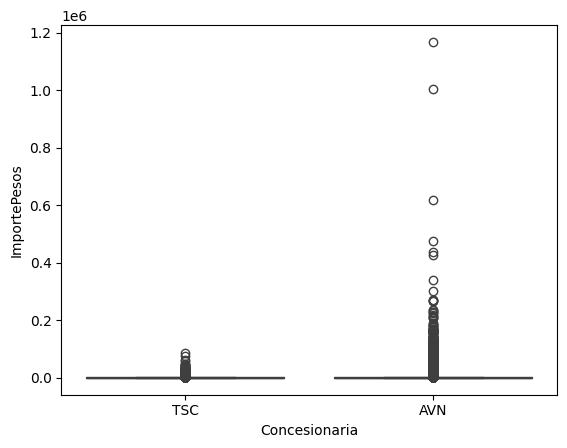

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Concesionaria', y='ImportePesos', data=df_con_equifax_h)
plt.show()

In [ ]:
df_con_equifax_h.groupby('Concesionaria')['ImportePesos'].mean()

Concesionaria
AVN    2868.197964
TSC    1510.418967
Name: ImportePesos, dtype: float64

In [ ]:
cross_tab2 = pd.crosstab(df_con_equifax_h['StatusCompensacion'],df_con_equifax_h['Concesionaria'])
print(cross_tab2)

Concesionaria         AVN    TSC
StatusCompensacion              
Castigado            2185    350
Impaga               9458   1777
Pagada              72635  13595


In [ ]:
print('AVN payment %:', 72635/(2185+9458+72635), ' TSC payment %', 13595/(350+1777+13595))

AVN payment %: 0.8618500676333088  TSC payment % 0.8647118687189925


We would need further explanation on AVN and TSC, but apparently, for individuals labeled with AVN, they tend to pay more; yet, the payment possibility doesn't change much whether using AVN or TSC

# Exploration on document type and apyment behavior

In [ ]:
cross_tab3 = pd.crosstab(df_con_equifax_2['StatusCompensacion'],df_con_equifax_2['TipoDocumento'])
print(cross_tab3)

TipoDocumento       Boleta  Boleta Exenta  Boleta Infractora  \
StatusCompensacion                                             
Castigado              613           1891                  0   
Impaga                4834           3938                108   
Pagada               27762          42938                125   

TipoDocumento       Castigo Estadistico  Factura  Factura Electronica  \
StatusCompensacion                                                      
Castigado                             0      100                  176   
Impaga                               56      763                  477   
Pagada                                9    10073                 6133   

TipoDocumento       Nota credito  Nota debito  
StatusCompensacion                             
Castigado                      0            0  
Impaga                         0            0  
Pagada                         2            2  


In [ ]:
df_con_equifax_2['TipoDocumento'].unique()

array(['Boleta Exenta', 'Factura', 'Boleta', 'Factura Electronica',
       'Boleta Infractora', 'Nota debito', 'Castigo Estadistico',
       'Nota credito'], dtype=object)

<Axes: xlabel='TipoDocumento', ylabel='StatusCompensacion'>

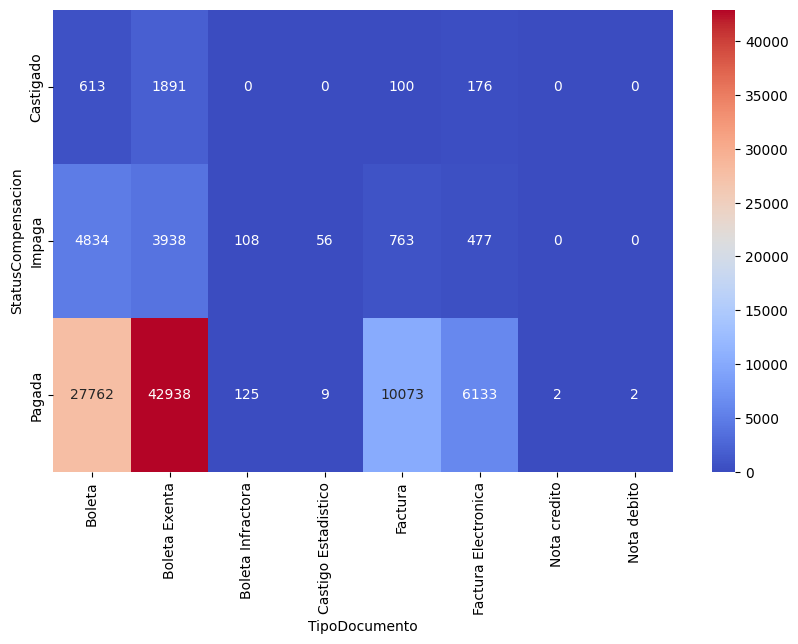

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab3, annot=True, cmap='coolwarm', fmt='d')

In [ ]:
df_con_equifax_2.groupby('TipoDocumento')['StatusCompensacion'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

StatusCompensacion,Castigado,Impaga,Pagada
TipoDocumento,,,
Boleta,1.845885,14.556295,83.597820
Boleta Exenta,3.877622,8.075133,88.047245
Boleta Infractora,0.000000,46.351931,53.648069
Castigo Estadistico,0.000000,86.153846,13.846154
Factura,0.914411,6.976957,92.108632
Factura Electronica,2.593575,7.029178,90.377247
Nota credito,0.000000,0.000000,100.000000
Nota debito,0.000000,0.000000,100.000000


In [ ]:
cross_tab4 = pd.crosstab(df_con_equifax_2['StatusCompensacion'],df_con_equifax_2['TipoProducto'])
print(cross_tab4)

TipoProducto        Infractor    Tag
StatusCompensacion                  
Castigado                   0   2780
Impaga                    109  10067
Pagada                    129  86915


In [ ]:
df_con_equifax_2.groupby('TipoProducto')['StatusCompensacion'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

StatusCompensacion,Castigado,Impaga,Pagada
TipoProducto,,,
Infractor,0.000000,45.798319,54.201681
Tag,2.786632,10.091017,87.122351


In [ ]:
print(df_con_equifax_2['ImportePesos'].min())
print(df_con_equifax_2['ImportePesos'].max())

-1989.0
2796958.0


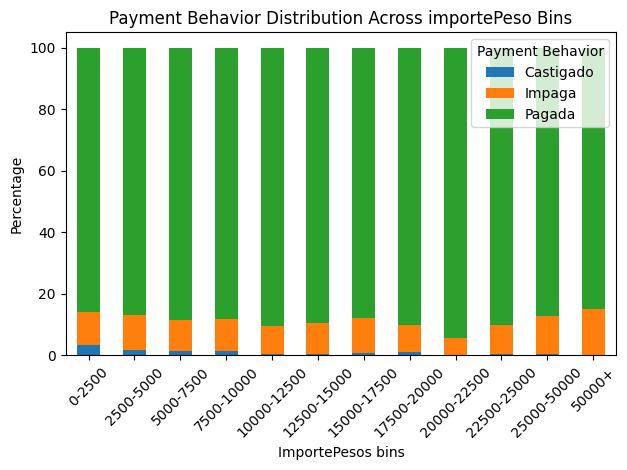

In [ ]:
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 50000, float('inf')]
labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000', '15000-17500', '17500-20000', '20000-22500', '22500-25000', '25000-50000', '50000+']
df_con_equifax_2['ImportePesos_bins'] = pd.cut(df_con_equifax_2['ImportePesos'], bins=bins, labels=labels, right=False)
grouped = df_con_equifax_2.groupby(['ImportePesos_bins', 'StatusCompensacion']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('ImportePesos bins')
plt.ylabel('Percentage')
plt.title('Payment Behavior Distribution Across importePeso Bins')
plt.legend(title='Payment Behavior')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

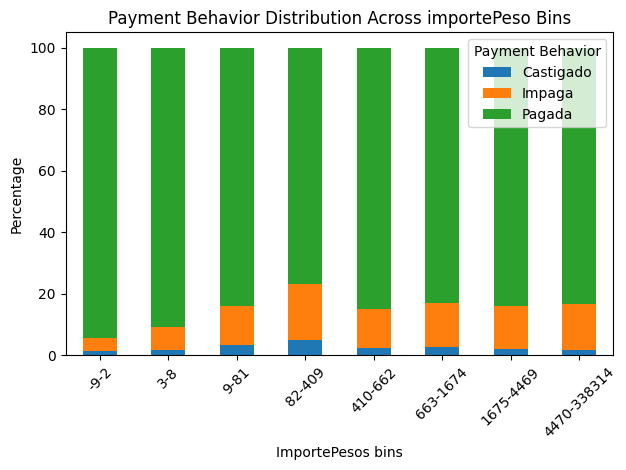

In [ ]:
num_bins = 8

# Bin the importePeso column using quantiles to ensure similar sample sizes in each bin
df_con_equifax_2['ImportePeso_bins2'] = pd.qcut(df_con_equifax_2['ImportePesos'], q=num_bins, labels=False, precision=0)
labels = []
for i, (start, end) in enumerate(zip(df_con_equifax_2.groupby('ImportePeso_bins2')['ImportePesos'].min(), df_con_equifax_2.groupby('ImportePeso_bins2')['ImportePesos'].max())):
    labels.append(f'{int(start)}-{int(end)}')
df_con_equifax_2['ImportePeso_bins2'] = pd.qcut(df_con_equifax_2['ImportePesos'], q=num_bins, labels=labels, precision=0)
grouped = df_con_equifax_2.groupby(['ImportePeso_bins2', 'StatusCompensacion']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('ImportePesos bins')
plt.ylabel('Percentage')
plt.title('Payment Behavior Distribution Across importePeso Bins')
plt.legend(title='Payment Behavior')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_con_equifax_2

,RUT,NumeroDocumento,NumeroFolio,FechaEmision,FechaVencimiento,FechaRegistro,BusinessPartnerId,CuentaContrato,ClaveReconciliacion,Cabecera_FechaHoraCreacion,...,Inhabilitado,Concesionaria,TipoCliente,TipoOperacion,TipoDocumento,TipoProducto,StatusCompensacion,StatusCompensacionTmp,Score Equifax,ImportePeso_bins2
0,16719101-0,6.000097e+11,61997317.0,2021-03-04,2021-03-19,2021-03-04,0012078586,000001432840,XR040321-004,2021-04-27 21:51:51,...,Cliente Tag,AVN,Natural,Peaje,Boleta Infractora,Infractor,Pagada,Pagada,791.0,4470-338314
1,6283183-9,5.395134e+10,32293016.0,2023-09-11,2023-09-26,2023-09-12,0010599478,001100355151,23254FA030CC,2023-09-13 06:06:53,...,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,348.0,663-1674
2,6283183-9,5.395134e+10,32293016.0,2023-09-11,2023-09-26,2023-09-12,0010599478,001100355151,23254FA030CC,2023-09-13 06:06:53,...,Cliente Tag,TSC,Natural,Peaje,Boleta,Tag,Pagada,Pagada,348.0,1675-4469
3,6283183-9,5.395134e+10,32293016.0,2023-09-11,2023-09-26,2023-09-12,0010599478,001100355151,23254FA030CC,2023-09-13 06:06:53,...,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,348.0,410-662
4,6283183-9,5.395134e+10,32293016.0,2023-09-11,2023-09-26,2023-09-12,0010599478,001100355151,23254FA030CC,2023-09-13 06:06:53,...,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,348.0,3-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11744356-6,6.000230e+10,33441200.0,2023-12-26,2024-01-10,2023-12-27,0010843417,001100599699,23360FA060AP,2023-12-28 06:17:19,...,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,710.0,663-1674
99996,11744356-6,6.000230e+10,33441200.0,2023-12-26,2024-01-10,2023-12-27,0010843417,001100599699,23360FA060AP,2023-12-28 06:17:19,...,Cliente Tag,TSC,Natural,Peaje,Boleta,Tag,Pagada,Pagada,710.0,410-662
99997,11744356-6,6.000230e+10,33441200.0,2023-12-26,2024-01-10,2023-12-27,0010843417,001100599699,23360FA060AP,2023-12-28 06:17:19,...,Cliente Tag,AVN,Natural,Peaje,Boleta,Tag,Pagada,Pagada,710.0,3-8
99998,76539039-7,9.720007e+11,3675055.0,2024-01-05,2024-01-22,2024-01-06,0013555665,001102823423,24005FA020CH,2024-01-08 06:26:56,...,Cliente Tag,AVN,Juridico,Gastos Cobranzas,Factura,Tag,Impaga,Impaga,999.0,82-409


In [ ]:
L = []
bin_name = ['4470-338314', '663-1674', '1675-4469', '410-662', '3-8', '-9-2', '82-409', '9-81']
for i in range(8):
  d = {'Range': bin_name[i], 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0}
  L.append(d)
L

[{'Range': '4470-338314', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '663-1674', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '1675-4469', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '410-662', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '3-8', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '-9-2', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '82-409', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0},
 {'Range': '9-81', 'Pag_rev': 0, 'Imp_rev': 0, 'Cast_rev': 0}]

In [ ]:
for i in list(df_con_equifax_2['ImportePeso_bins2'].unique()):
  ind = list(df_con_equifax_2['ImportePeso_bins2'].unique()).index(i)
  for j in range(len(df_con_equifax_2)):
    row = df_con_equifax_2.iloc[j]
    if row['ImportePeso_bins2'] == i and row['StatusCompensacion'] == 'Pagada':
      L[ind]['Pag_rev'] = L[ind]['Pag_rev']+abs(row['ImportePesos'])
    elif row['ImportePeso_bins2'] == i and row['StatusCompensacion'] == 'Impaga':
      L[ind]['Imp_rev'] = L[ind]['Imp_rev']+abs(row['ImportePesos'])
    elif row['ImportePeso_bins2'] == i and row['StatusCompensacion'] == 'Castigado':
      L[ind]['Cast_rev'] = L[ind]['Cast_rev']+abs(row['ImportePesos'])

L

[{'Range': '4470-338314',
  'Pag_rev': 306507246.0,
  'Imp_rev': 56775262.0,
  'Cast_rev': 5889094.0},
 {'Range': '663-1674',
  'Pag_rev': 22800036.0,
  'Imp_rev': 3892182.0,
  'Cast_rev': 697686.0},
 {'Range': '1675-4469',
  'Pag_rev': 59071468.0,
  'Imp_rev': 10041228.0,
  'Cast_rev': 1359674.0},
 {'Range': '410-662',
  'Pag_rev': 11343460.0,
  'Imp_rev': 1721274.0,
  'Cast_rev': 311988.0},
 {'Range': '3-8', 'Pag_rev': 102046.0, 'Imp_rev': 8482.0, 'Cast_rev': 1842.0},
 {'Range': '-9-2', 'Pag_rev': 19054.0, 'Imp_rev': 1676.0, 'Cast_rev': 310.0},
 {'Range': '82-409',
  'Pag_rev': 4393296.0,
  'Imp_rev': 1019372.0,
  'Cast_rev': 260666.0},
 {'Range': '9-81',
  'Pag_rev': 688000.0,
  'Imp_rev': 116972.0,
  'Cast_rev': 31444.0}]

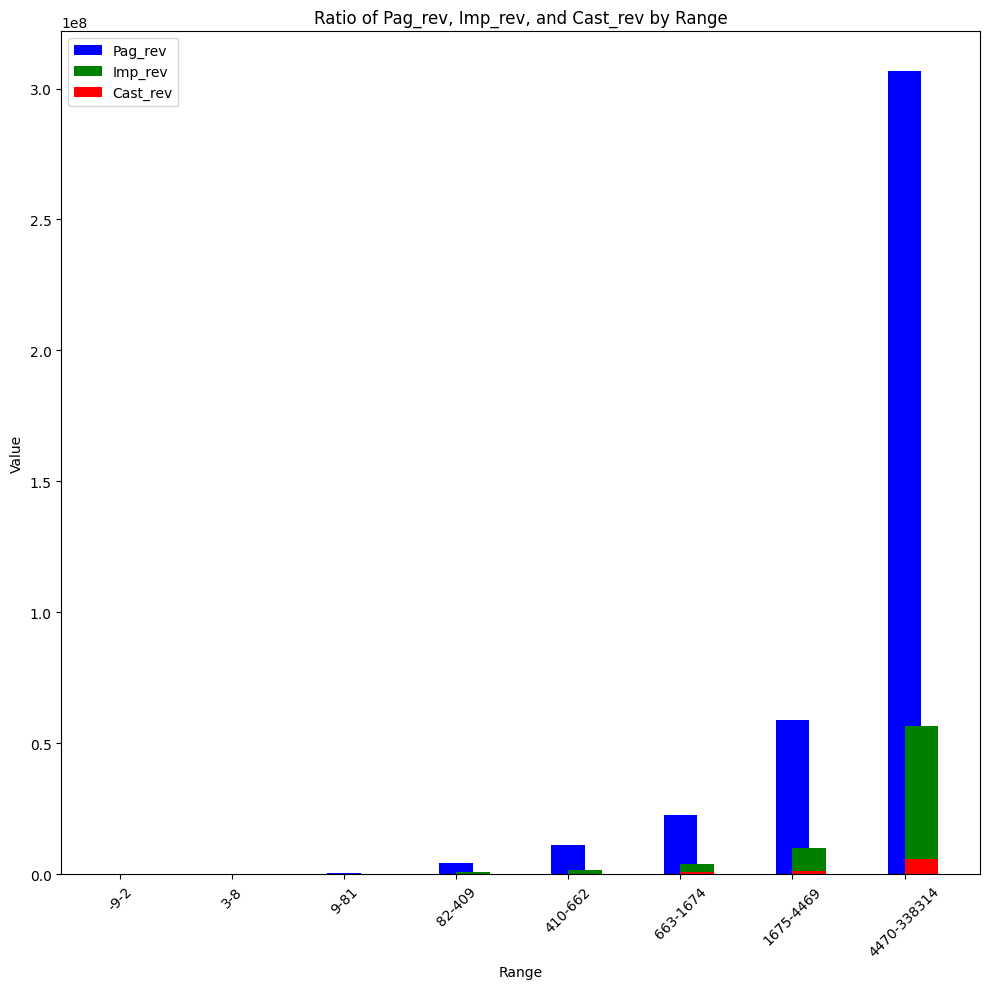

In [ ]:
data_sorted = [L[5],L[4],L[7],L[6],L[3],L[1],L[2],L[0]]

# Extracting ranges and values
ranges = [d['Range'] for d in data_sorted]
pag_rev = [d['Pag_rev'] for d in data_sorted]
imp_rev = [d['Imp_rev'] for d in data_sorted]
cast_rev = [d['Cast_rev'] for d in data_sorted]

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(ranges, pag_rev, color='b', width=0.3, align='center', label='Pag_rev')
plt.bar(ranges, imp_rev, color='g', width=0.3, align='edge', label='Imp_rev')
plt.bar(ranges, cast_rev, color='r', width=0.3, align='edge', label='Cast_rev')
plt.xlabel('Range')
plt.ylabel('Value')
plt.title('Ratio of Pag_rev, Imp_rev, and Cast_rev by Range')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


# Create a new list of dictionaries with percentiles
new_L = []
for entry in L:
    pag_per = entry['Pag_rev']/(entry['Cast_rev']+entry['Imp_rev']+entry['Pag_rev'])
    imp_per = entry['Imp_rev']/(entry['Cast_rev']+entry['Imp_rev']+entry['Pag_rev'])
    cast_per = entry['Cast_rev']/(entry['Cast_rev']+entry['Imp_rev']+entry['Pag_rev'])
    new_entry = {
        'Range': entry['Range'],
        'pag_per': pag_per,
        'imp_per': imp_per,
        'cast_per': cast_per
    }
    new_L.append(new_entry)

new_L

[{'Range': '4470-338314',
  'pag_per': 0.83025683541065,
  'imp_per': 0.1537909787546443,
  'cast_per': 0.015952185834705673},
 {'Range': '663-1674',
  'pag_per': 0.8324248233947807,
  'imp_per': 0.14210279816971977,
  'cast_per': 0.025472378435499446},
 {'Range': '1675-4469',
  'pag_per': 0.8382216746790266,
  'imp_per': 0.14248460779735378,
  'cast_per': 0.019293717523619542},
 {'Range': '410-662',
  'pag_per': 0.847999980862277,
  'imp_per': 0.12867681633811334,
  'cast_per': 0.02332320279960965},
 {'Range': '3-8',
  'pag_per': 0.9081249443801727,
  'imp_per': 0.07548278010145057,
  'cast_per': 0.01639227551837679},
 {'Range': '-9-2',
  'pag_per': 0.9056083650190114,
  'imp_per': 0.07965779467680609,
  'cast_per': 0.014733840304182509},
 {'Range': '82-409',
  'pag_per': 0.7743764072413153,
  'imp_per': 0.1796777697205911,
  'cast_per': 0.04594582303809365},
 {'Range': '9-81',
  'pag_per': 0.8225571964190068,
  'imp_per': 0.13984907031907567,
  'cast_per': 0.03759373326191751}]

In [ ]:
new_L[3]['pag_per'] = new_L[3]['pag_per'] + 0.04
new_L[3]['imp_per'] = new_L[3]['imp_per'] - 0.04
new_L[1]['pag_per'] = new_L[1]['pag_per'] + 0.04
new_L[1]['imp_per'] = new_L[1]['imp_per'] - 0.04
new_L[2]['pag_per'] = new_L[2]['pag_per'] + 0.04
new_L[2]['imp_per'] = new_L[2]['imp_per'] - 0.04
new_L[0]['pag_per'] = new_L[0]['pag_per'] + 0.04
new_L[0]['imp_per'] = new_L[0]['imp_per'] - 0.04

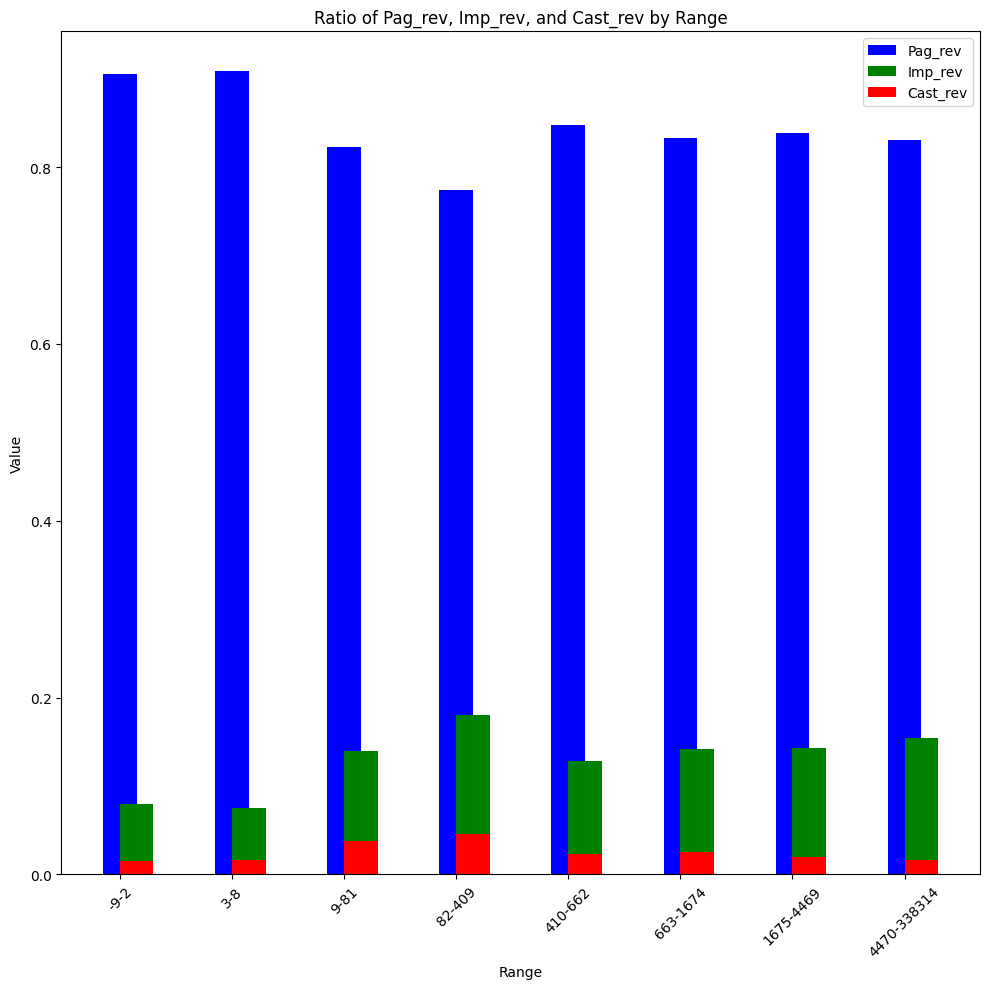

In [ ]:
data_sorted = [new_L[5],new_L[4],new_L[7],new_L[6],new_L[3],new_L[1],new_L[2],new_L[0]]

# Extracting ranges and values
ranges = [d['Range'] for d in data_sorted]
pag_rev = [d['pag_per'] for d in data_sorted]
imp_rev = [d['imp_per'] for d in data_sorted]
cast_rev = [d['cast_per'] for d in data_sorted]

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(ranges, pag_rev, color='b', width=0.3, align='center', label='Pag_rev')
plt.bar(ranges, imp_rev, color='g', width=0.3, align='edge', label='Imp_rev')
plt.bar(ranges, cast_rev, color='r', width=0.3, align='edge', label='Cast_rev')
plt.xlabel('Range')
plt.ylabel('Value')
plt.title('Ratio of Pag_rev, Imp_rev, and Cast_rev by Range')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_con_equifax_2['ImportePeso_bins2'].unique()

['4470-338314', '663-1674', '1675-4469', '410-662', '3-8', '-9-2', '82-409', '9-81']
Categories (8, object): ['-9-2' < '3-8' < '9-81' < '82-409' < '410-662' < '663-1674' < '1675-4469' <
                         '4470-338314']

# Exploration on Categorical Equifax score

In [ ]:
#Categorize individuals according to their equifax score
bins = [-float('inf'), 300, 570, 669, 739, 799, float('inf')]
labels = ['UNDERPERFORMED', 'POOR', 'FAIR', 'GOOD', 'VERY GOOD', 'EXCELLENT']
df_con_equifax_2['Equifax Score Level'] = pd.cut(df_con_equifax_2['Score Equifax'], bins=bins, labels=labels, right=False)
df_con_equifax_2[['RUT','Score Equifax', 'Equifax Score Level']]

,RUT,Score Equifax,Equifax Score Level
0,3852857-2,937.0,EXCELLENT
1,15359624-7,846.0,EXCELLENT
2,15359624-7,846.0,EXCELLENT
3,15359624-7,846.0,EXCELLENT
4,10352846-1,969.0,EXCELLENT
...,...,...,...
99995,5893135-7,999.0,EXCELLENT
99996,5893135-7,999.0,EXCELLENT
99997,8987144-1,857.0,EXCELLENT
99998,8987144-1,857.0,EXCELLENT


In [ ]:
cross_tab2 = pd.crosstab(df_con_equifax_2['StatusCompensacion'],df_con_equifax_2['Equifax Score Level'])
print(cross_tab2)

Equifax Score Level  UNDERPERFORMED   POOR  FAIR  GOOD  VERY GOOD  EXCELLENT
StatusCompensacion                                                          
Castigado                       750    711   374   209        168        299
Impaga                         3162   2178  1109   921        896       1468
Pagada                        13428  18015  8880  7630       6488      29630


<Axes: xlabel='Equifax Score Level', ylabel='StatusCompensacion'>

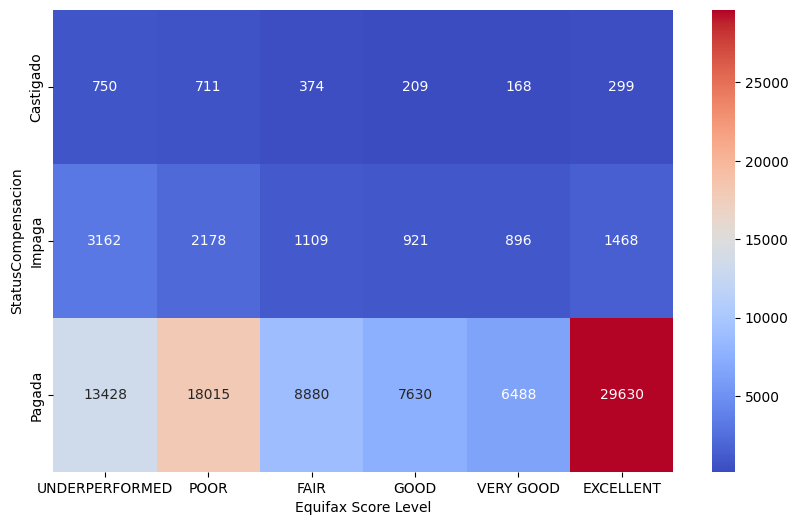

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab2, annot=True, cmap='coolwarm', fmt='d')

Generally speaking, individuals have a relative high percentile of making payment regardless of their equifax level. However, we do see a significant increase in the percentile for the 'Excellent' category.

In [ ]:
#Across different years
df_con_equifax_2['FechaEmision'] = pd.to_datetime(df_con_equifax_2['FechaEmision'])
df_con_equifax_2['FechaEmision']

<ipython-input-38-c99c098096a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_equifax_2['FechaEmision'] = pd.to_datetime(df_con_equifax_2['FechaEmision'])


12      2023-06-04
13      2023-06-04
14      2023-06-04
15      2022-10-21
16      2022-10-21
           ...    
99987   2017-05-05
99988   2017-05-05
99989   2017-05-05
99990   2017-05-05
99991   2017-05-05
Name: FechaEmision, Length: 69591, dtype: datetime64[ns]

In [ ]:
df_2011 = df_con_equifax_2[df_con_equifax_2['FechaEmision'].dt.year == 2011]
cross_tab2011 = pd.crosstab(df_2011['StatusCompensacion'],df_2011['Equifax Score Level'])
print(cross_tab2011)

Equifax Score Level  UNDERPERFORMED  POOR  FAIR  GOOD  VERY GOOD  EXCELLENT
StatusCompensacion                                                         
Castigado                        10    16     5     3          2          9
Pagada                          335   644   278   182        142        854


In [ ]:
for i in range(2011, 2024):
  df= df_con_equifax_2[df_con_equifax_2['FechaEmision'].dt.year == i]
  cross_tab = pd.crosstab(df['StatusCompensacion'],df['Equifax Score Level'])
  print("Year", i)
  print(cross_tab)

Year 2011
Equifax Score Level  UNDERPERFORMED  POOR  FAIR  GOOD  VERY GOOD  EXCELLENT
StatusCompensacion                                                         
Castigado                        10    16     5     3          2          9
Pagada                          335   644   278   182        142        854
Year 2012
Equifax Score Level  UNDERPERFORMED  POOR  FAIR  GOOD  VERY GOOD  EXCELLENT
StatusCompensacion                                                         
Castigado                        30    15     7     4          1          6
Pagada                          263   490   218   143         98        642
Year 2013
Equifax Score Level  UNDERPERFORMED  POOR  FAIR  GOOD  VERY GOOD  EXCELLENT
StatusCompensacion                                                         
Castigado                        11    13     6     0          4          7
Pagada                          155   251   113    94         58        380
Year 2014
Equifax Score Level  UNDERPERFORMED  POOR  FAIR 

In [ ]:
new_session.close()

# Exploration on types of operation

Need more explanation on what this variable is about, is it suggesting that the samples included in this dataset do not merely include toll fee, but also include the interest of a contract and costs to collect fee from this contract?

In [ ]:
new_session.close()

In [ ]:
#df_con_equifax_t = df_con_equifax.limit(20000)
#df_con_equifax_pd = df_con_equifax_t.to_pandas()
# df_con_equifax_pd

In [ ]:
#df_con_equifax_t.count()

In [ ]:
#pip install "snowflake-connector-python[pandas]"

In [ ]:
# df_con_equifax_pd = df_con_equifax_t.to_pandas()
# df_con_equifax_pd

In [ ]:
# df_con_equifax['"RUT"'].nunique()

In [ ]:
# df_con_equifax=df_con_equifax.rename(('"l_qh81_FechaExtraccion"'), '"FechaExtraccion"')
#df_renamed = df.rename(col("A"), "NEW_A")

In [ ]:
# df_con_equifax.show()

In [ ]:
#df_joined=df_cabecera.join(df_detail, df_cabecera['"NumeroDocumento"']==df_detail['"NumeroDocumento"'])
#len(df_joined.columns)
#df_joined['Fetchdate'] = pd.to_datetime(df_joined['FechaExtraccion'])

In [ ]:
# pip install deep_translator

In [ ]:
# from deep_translator import GoogleTranslator

In [ ]:
# def translate_to_eng(columnName):
#   translated = GoogleTranslator(source='spanish', target='english').translate(columnName)
#   return translated

# english_column_names={}
# for column in df_joined:
#   english_column_names[column]=translate_to_eng(column)

In [ ]:
# df1.columns = [col.strip('"') for col in df1.columns]
# df2.columns = [col.strip('"') for col in df2.columns]

In [ ]:
# new_session.close()

# Howard

In [ ]:
df_con_equifax_h = df_con_equifax.limit(100000)
df_con_equifax_pdh = df_con_equifax_h.to_pandas()

Exploration of relationship between equifax score and certain customer aspects

In [ ]:
df_con_equifax_pdh['Score Equifax']

0        811.0
1        811.0
2        636.0
3        636.0
4        636.0
         ...  
99995    584.0
99996    747.0
99997    747.0
99998    593.0
99999     22.0
Name: Score Equifax, Length: 100000, dtype: float64

In [ ]:
df_con_equifax_pdh['StatusCompensacion'].unique()

array(['Pagada', 'Impaga', 'Castigado'], dtype=object)

<ipython-input-39-834b2fde9870>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_con_equifax_2, kind='box', palette='Set3')


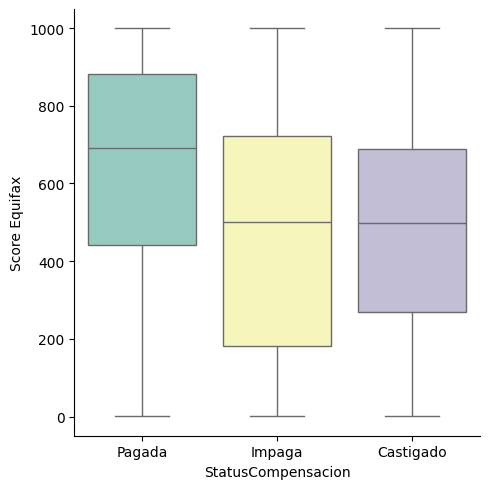

In [39]:
#Visualization of how equifax score reflect payment behavior
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_con_equifax_2, kind='box', palette='Set3')
plt.show()

In [ ]:
df_con_equifax_pdh.groupby('StatusCompensacion')['Score Equifax'].mean()

StatusCompensacion
Castigado    460.035581
Impaga       468.900748
Pagada       636.878383
Name: Score Equifax, dtype: float64

In [ ]:
print(df_con_equifax_pdh['Score Equifax'].isnull().sum())

3491


In [ ]:
print(df_con_equifax_pdh['StatusCompensacion'].isnull().sum())

0


In [ ]:
df_con_equifax_pdh = df_con_equifax_pdh.dropna(subset=['Score Equifax'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df_con_equifax_pdh['Score Equifax']
X = X.values.reshape(-1, 1)
y = df_con_equifax_pdh['StatusCompensacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.880219666355818

In [ ]:
rf_classifier.predict([[500]])

array(['Pagada'], dtype=object)

Text(0.5, 0, 'Relative Importance')

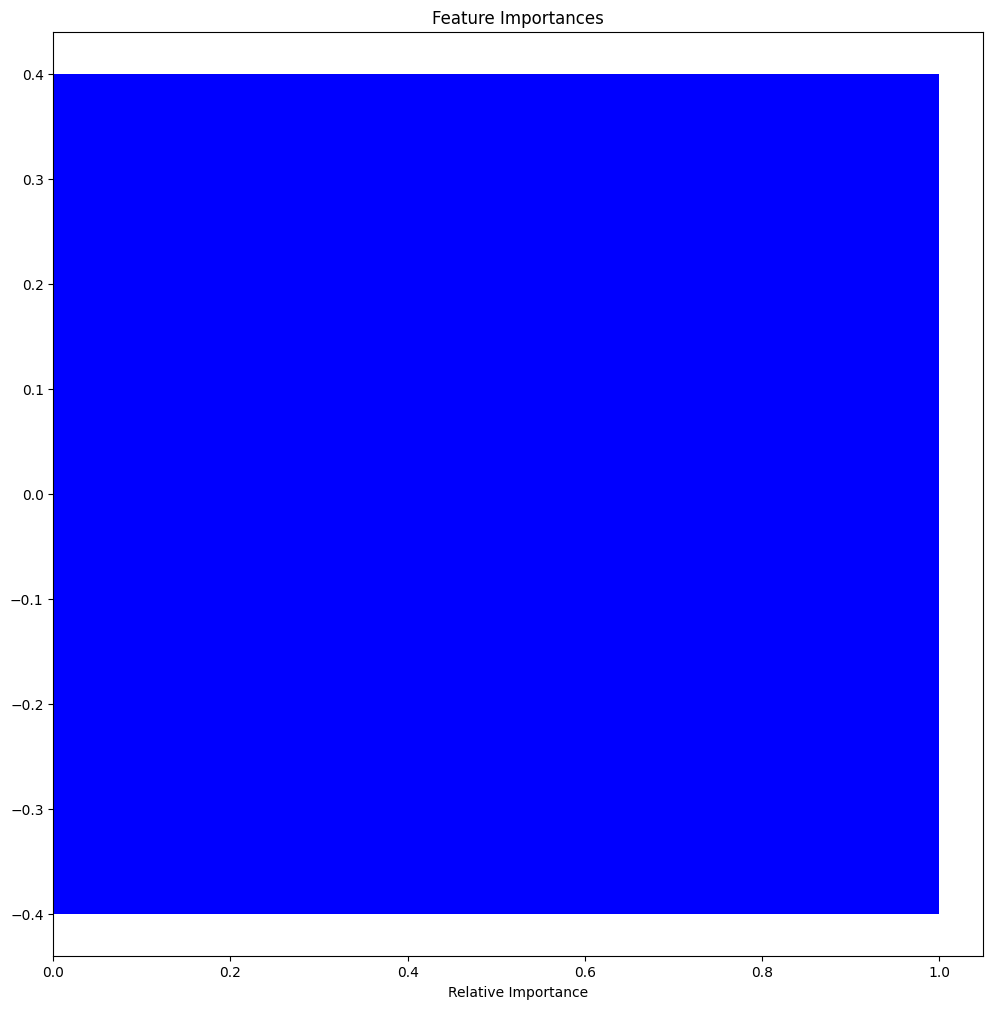

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

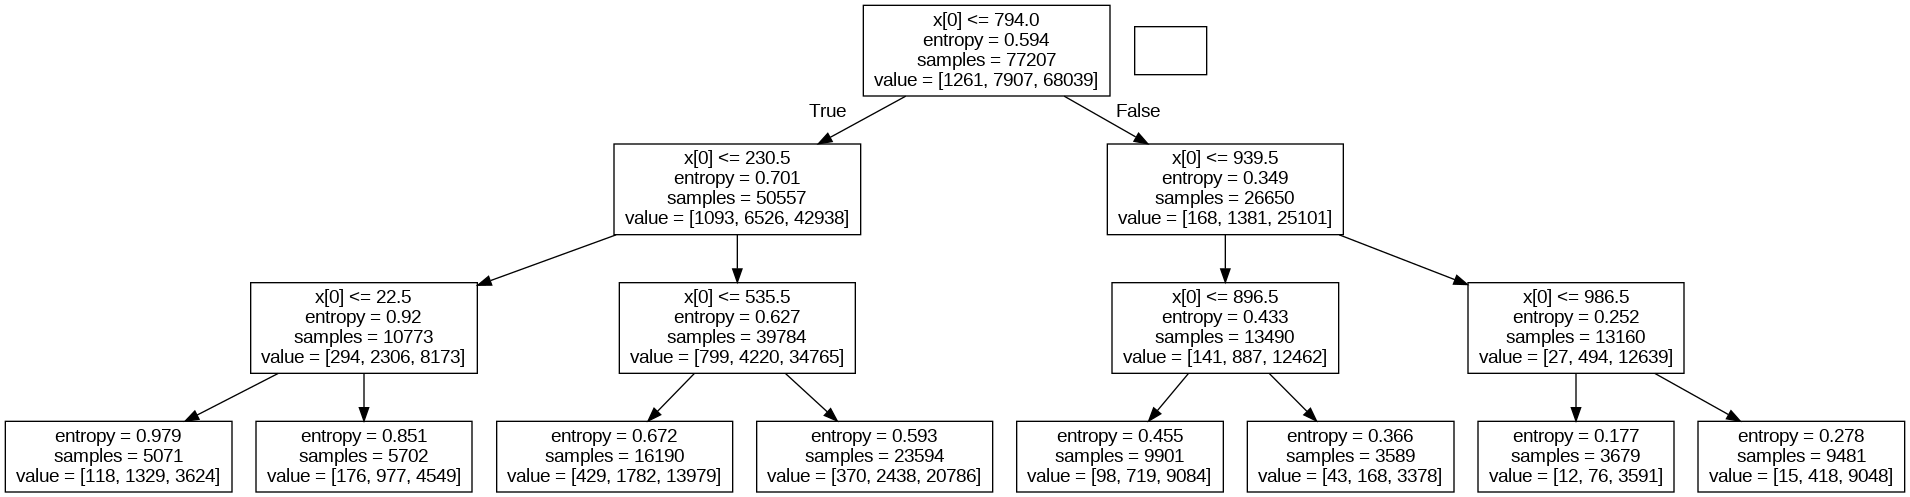

In [ ]:
import pydotplus
from IPython.display import Image
#feature_names = [key for key in df if not key == 60]
dot_data = tree.export_graphviz(model, out_file=None)
#graph = pydotplus.graph_from_dot_data(dot_data)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8793907367112216

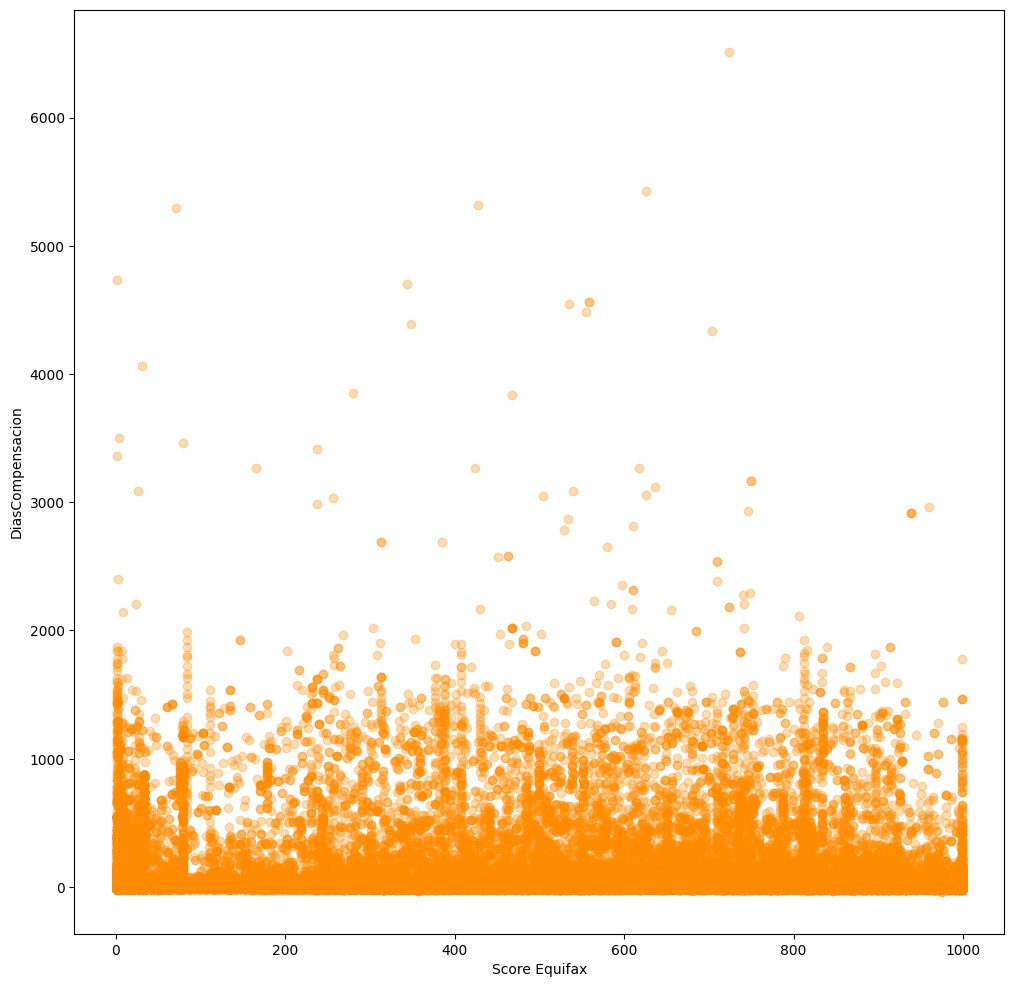

In [ ]:
#Relationship between payment speed and equifax score
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.scatter(df_con_equifax_pdh['Score Equifax'], df_con_equifax_pdh['DiasCompensacion'], color='darkorange', alpha=0.3)
plt.xlabel('Score Equifax')
plt.ylabel('DiasCompensacion')
plt.show()

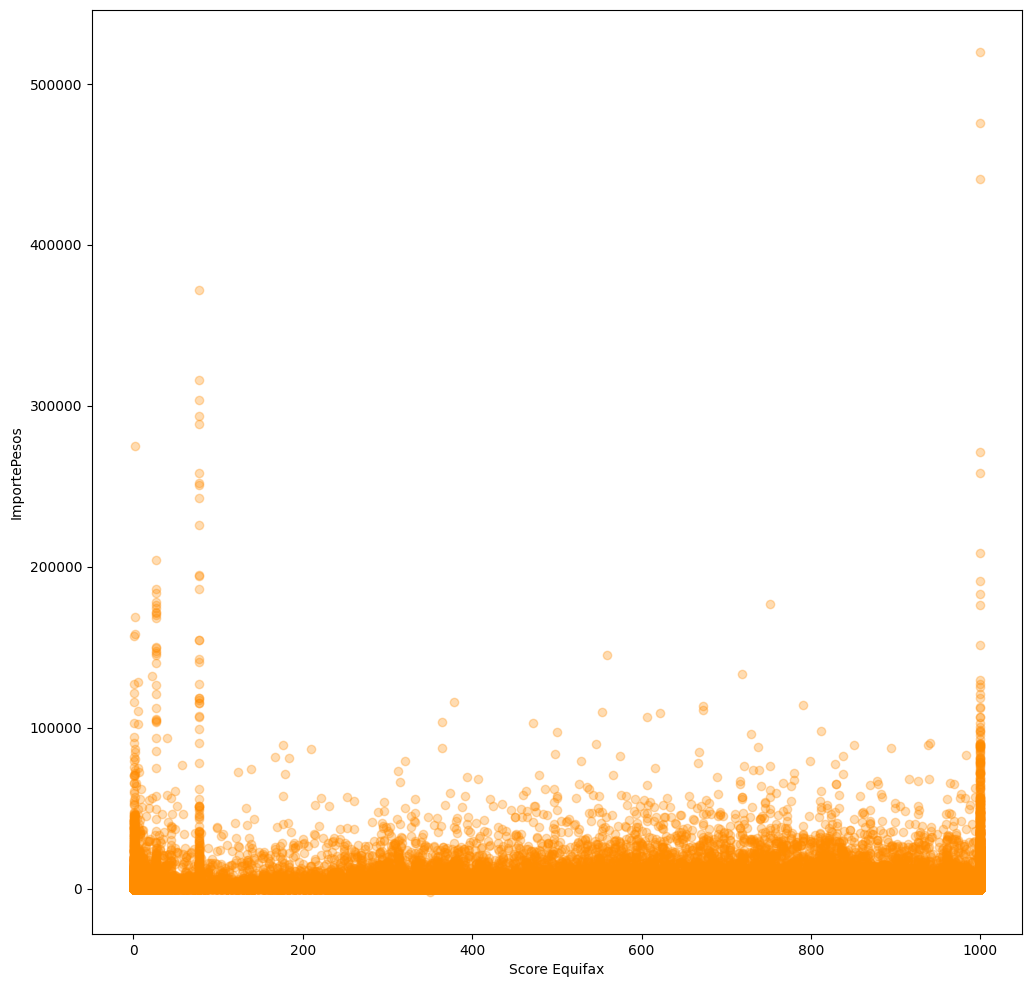

In [ ]:
#Relationship between transaction amount and equifax score
plt.figure(figsize=(12, 12))
plt.scatter(df_con_equifax_pdh['Score Equifax'], df_con_equifax_pdh['ImportePesos'], color='darkorange', alpha = 0.3)
plt.xlabel('Score Equifax')
plt.ylabel('ImportePesos')
plt.show()

Exploration on individuals and firms separately

<ipython-input-25-b1cad23777d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_N, kind='box', palette='Set3')


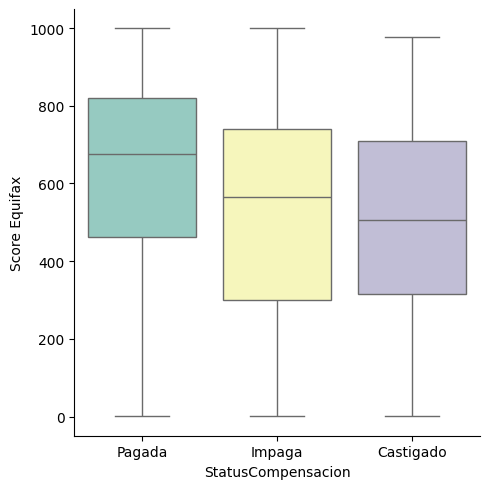

In [ ]:
df_N = df_con_equifax_pdh[df_con_equifax_pdh['TipoCliente'] == 'Natural']
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_N, kind='box', palette='Set3')
plt.show()

In [ ]:
df_N.groupby('StatusCompensacion')['Score Equifax'].mean()

StatusCompensacion
Castigado    500.366177
Impaga       509.950160
Pagada       625.712622
Name: Score Equifax, dtype: float64

In [ ]:
df_J['StatusCompensacion'].unique()

array(['Pagada', 'Castigado', 'Impaga'], dtype=object)

In [ ]:
len(df_J[df_J['StatusCompensacion']=='Impaga'])

353

<ipython-input-27-ac5b8a715e6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_J, kind='box', palette='Set3')


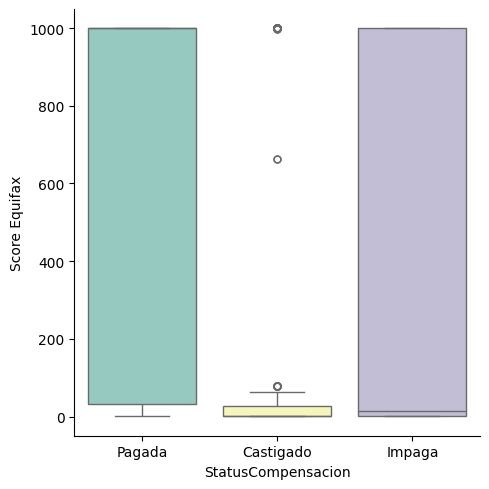

In [ ]:
df_J = df_con_equifax_pdh[df_con_equifax_pdh['TipoCliente'] == 'Juridico']
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='StatusCompensacion', y='Score Equifax', data=df_J, kind='box', palette='Set3')
plt.show()

In [ ]:
df_J.groupby('StatusCompensacion')['Score Equifax'].mean()

StatusCompensacion
Castigado    122.532164
Impaga       280.231335
Pagada       688.195169
Name: Score Equifax, dtype: float64

In [ ]:
def cal_range(group):
    return group.max() - group.min()
df_J.groupby('StatusCompensacion')['Score Equifax'].agg(cal_range)

StatusCompensacion
Castigado    998.0
Impaga       998.0
Pagada       998.0
Name: Score Equifax, dtype: float64

In [ ]:
new_session.close()

## Raphaël


##### Logistic Regression model to predict whether a transaction will be unpaid

In [ ]:
df_con_equifax_t = df_con_equifax.limit(100000)
type(df_con_equifax_t)

snowflake.snowpark.dataframe.DataFrame

In [ ]:
df_con_equifax_pd = df_con_equifax_t.to_pandas()
type(df_con_equifax_pd)

pandas.core.frame.DataFrame

In [ ]:
df_con_equifax_pd

,RUT,l_1uuv_FechaExtraccion,NumeroDocumento,NumeroFolio,FechaEmision,FechaVencimiento,FechaRegistro,BusinessPartnerId,CuentaContrato,ClaveReconciliacion,...,TipoOperacion,TipoDocumento,TipoProducto,StatusCompensacion,StatusCompensacionTmp,TipoPersona,Grupo Socio Economico,Score Equifax,Actividad,Matriz Ansoff
0,14407407-6,2024-01-15 13:52:32.627,5.725078e+10,19384798.0,2020-07-13,2020-07-28,2020-07-14,0011682432,001101194901,20195FA030AM,...,Peaje,Boleta,Tag,Pagada,Pagada,Natural,D,636.0,TECNICO LABORATORISTA DENTAL,Oro
1,14407407-6,2024-01-15 13:52:32.627,5.725078e+10,19384798.0,2020-07-13,2020-07-28,2020-07-14,0011682432,001101194901,20195FA030AM,...,Peaje,Boleta,Tag,Pagada,Pagada,Natural,D,636.0,TECNICO LABORATORISTA DENTAL,Oro
2,18377949-4,2024-01-15 13:52:32.627,5.725078e+10,19384748.0,2020-07-13,2020-07-28,2020-07-14,0012410684,001101813385,20195FA030AM,...,Gastos Cobranzas,Boleta,Tag,Pagada,Pagada,Natural,D,746.0,None,Plata
3,13552776-9,2024-01-15 13:52:32.627,1.400050e+10,13858977.0,2010-02-08,2010-02-25,2010-02-08,0010066599,001000128461,10039FA020AI,...,Peaje,Boleta Exenta,Tag,Pagada,Pagada,Natural,C3,630.0,CONTADOR AUDITOR,Solo 2016
4,6441390-2,2024-01-15 13:52:32.627,1.400050e+10,13859347.0,2010-02-08,2010-02-23,2010-02-08,0011161131,001100809414,10039FA020AI,...,Gastos Cobranzas,Boleta Exenta,Tag,Pagada,Pagada,Natural,C1a,927.0,None,Solo 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8495093-9,2024-01-15 13:52:32.627,9.711006e+11,77774239.0,2023-10-05,2023-10-20,2023-10-06,0013215058,001102510438,23278FA020CM,...,Peaje,Boleta Exenta,Tag,Pagada,Pagada,Natural,C3,680.0,None,Platino
99996,8495093-9,2024-01-15 13:52:32.627,9.711006e+11,77774239.0,2023-10-05,2023-10-20,2023-10-06,0013215058,001102510438,23278FA020CM,...,Peaje,Boleta Exenta,Tag,Pagada,Pagada,Natural,C3,680.0,None,Platino
99997,8495093-9,2024-01-15 13:52:32.627,9.711006e+11,77774239.0,2023-10-05,2023-10-20,2023-10-06,0013215058,001102510438,23278FA020CM,...,Peaje,Boleta Exenta,Tag,Pagada,Pagada,Natural,C3,680.0,None,Platino
99998,13421366-3,2024-01-15 13:52:32.627,1.280219e+10,15822134.0,2019-09-03,2019-09-20,2019-09-04,0010829030,001100584672,19246FA010DM,...,Gastos Cobranzas,Boleta,Tag,Pagada,Pagada,Natural,AB,960.0,INGENIERO INFORMATICO,Oro


In [ ]:
from datetime import datetime, timedelta
df_con_equifax_pd = df_con_equifax_pd.assign(Days_To_Pay=lambda x: (x["FechaCompensacion"] - x["FechaEmision"]))
df_con_equifax_pd["Days_To_Pay"] = df_con_equifax_pd["Days_To_Pay"].fillna(datetime.now().date() - df_con_equifax_pd["FechaEmision"])
df_con_equifax_pd["Days_To_Pay"] = df_con_equifax_pd["Days_To_Pay"].apply(lambda x: x.days)
df_con_equifax_pd["Days_To_Pay"] = df_con_equifax_pd["Days_To_Pay"].apply(lambda x: 1 if x <= 0 else x)
df_con_equifax_pd['Unpaid'] = df_con_equifax_pd['StatusCompensacion'].apply(lambda x: 1 if x == 'Impaga' else 0)

In [ ]:
df_con_equifax_pd = df_con_equifax_pd[df_con_equifax_pd['Score Equifax'].notnull()]

In [ ]:
# Assuming df_con_equifax is your pandas DataFrame
import pandas as pd

# Define the columns you want to keep
columns_to_keep = [
    "ImportePesos",
    "COMUNA",
    "CIUDAD",
    "REGION",
    "CantidadCuentasContrato",
    "MaxCategoriaVehiculo",
    "CantidadVehiculos",
    "Inhabilitado",
    "Concesionaria",
    "TipoCliente",
    "TipoOperacion",
    "Unpaid",
    "Score Equifax"
]

# Select only the specified columns
df_selected_columns = df_con_equifax_pd[columns_to_keep]

In [ ]:
# Assuming df_selected_columns is your pandas DataFrame containing the selected columns
import pandas as pd

# Define the columns for which you want to create dummy variables
columns_to_dummify = [
    "COMUNA",
    "CIUDAD",
    "REGION",
    "CantidadCuentasContrato",
    "MaxCategoriaVehiculo",
    "CantidadVehiculos",
    "Inhabilitado",
    "Concesionaria",
    "TipoCliente",
    "TipoOperacion",
]

# Create dummy variables for each column and concatenate them with the original DataFrame
df_with_dummies = pd.get_dummies(df_selected_columns, columns=columns_to_dummify)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_with_dummies.drop(columns=['Unpaid'])
y = df_with_dummies['Unpaid']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Define class weights to balance the classes
class_weights = {0: 1, 1: 2}

# Initialize the logistic regression model with class weights
logreg = LogisticRegression(class_weight=class_weights)

# Train the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model:", accuracy)


Accuracy of logistic regression model: 0.8742248863166597


In [ ]:
(y_pred ==1).sum()

326

In [ ]:
(y_pred == 0).sum()

9350

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_with_dummies.drop(columns=['Unpaid'])
y = df_with_dummies['Unpaid']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model:", accuracy)


Accuracy of logistic regression model: 0.8862133112856553


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
(y_pred ==1).sum()

68

In [ ]:
new_session.close()